**CURSO**: *Machine Learning* en Geociencias<br />
**Profesor**: Edier Aristizábal (evaristizabalg@unal.edu.co) <br />
**Credits**: The content of this notebook is taken from several sources. Every effort has been made to trace copyright holders of the materials used in this notebook. The author apologies for any unintentional omissions and would be pleased to add an acknowledgment in future editions.


# 19: MODELOS DE REDES NEURONALES

El primer método a utilizar es el de *Multi Layer Perceptron*. En este caso se recomienda estandarizar las variables, utilizando la función *scaler*. Y para generar el modelo se utilizarán dos capas escondidas, una de 5 neuronas y otra de 2 neuronas, con un número de 500 interacciones. Existen muchos mas parametros del modelo que se pueden ajustar en la página web de la librería.

In [6]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")

In [7]:
from sklearn.datasets import load_iris
iris=load_iris()
X=iris['data']
y=iris['target']

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
StandardScaler(copy=True, with_mean=True, with_std=True)
X = scaler.transform(X)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [11]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(5,2),max_iter=500)
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [16]:
y_pred = mlp.predict(X_test)

In [13]:
print(mlp.score(X_test,y_test))

0.9666666666666667


In [14]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=5, random_state=1)
results = cross_val_score(mlp, X_train, y_train, cv=kfold)
print(results.mean())
print(results.std())

0.725
0.15500896031448563


In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [18]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


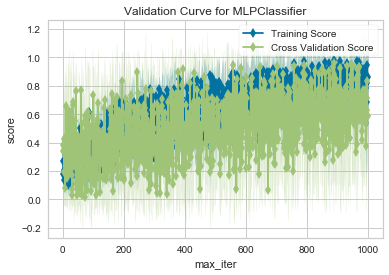

In [20]:
from yellowbrick.model_selection import ValidationCurve
h=np.arange(1,1000)
k=ValidationCurve(mlp,param_name='max_iter', param_range=h, cv=kfold, scoring='f1_weighted',n_jobs=4)
k.fit(X,y)
k.show();

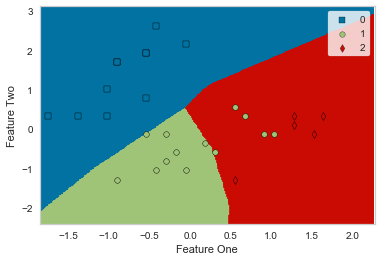

In [21]:
from yellowbrick.contrib.classifier import DecisionViz
viz=DecisionViz(MLPClassifier(alpha=0.001, hidden_layer_sizes=(6, 4), max_iter=500))
viz.fit(X_train[:,:2], y_train)
viz.draw(X_test[:,:2],y_test)
viz.show();

In [25]:
len(mlp.coefs_)

3

In [27]:
len(mlp.coefs_[0])

4

In [26]:
len(mlp.intercepts_[0])

5